In [93]:
import pandas as pd
import env
import acquire
import wrangle
import matplotlib as plt
import seaborn as sns

In [11]:
zillow = acquire.get_zillow_data()
zillow

/Users/alfredpirovits/codeup-data-science/clustering-exercises/acquire.py:11: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename, index_col=[0])


,parcelid,storytypeid,heatingorsystemtypeid,propertylandusetypeid,typeconstructiontypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,architecturalstyledesc,buildingclassdesc,typeconstructiondesc,propertylandusedesc,heatingorsystemdesc,storydesc,id.1,parcelid.1,logerror,transactiondate
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0,14297519,0.025595,2017-01-01
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,1,17052889,0.055619,2017-01-01
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,2,14186244,0.005383,2017-01-01
3,12177905,NaN,2.0,261.0,NaN,NaN,NaN,NaN,2288172,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,3,12177905,-0.103410,2017-01-01
4,10887214,NaN,2.0,266.0,NaN,NaN,NaN,1.0,1970746,NaN,...,NaN,NaN,NaN,Condominium,Central,NaN,4,10887214,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,11000655,NaN,2.0,261.0,NaN,NaN,NaN,NaN,673515,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,77609,11000655,0.020615,2017-09-20
77576,17239384,NaN,NaN,261.0,NaN,NaN,NaN,NaN,2968375,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,77610,17239384,0.013209,2017-09-21
77577,12773139,NaN,2.0,261.0,NaN,NaN,NaN,1.0,1843709,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,77611,12773139,0.037129,2017-09-21
77578,12826780,NaN,2.0,261.0,NaN,NaN,NaN,NaN,1187175,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,77612,12826780,0.007204,2017-09-25


In [12]:
zillow.duplicated(subset='parcelid', keep='first').sum()

199

In [13]:
pd.set_option('display.max_rows', 200)

zillow_duplicates = zillow[zillow.duplicated(subset='parcelid', keep=False)]
zillow_duplicates[['parcelid', 'transactiondate']]


,parcelid,transactiondate
116,11393337,2017-01-03
117,11393337,2017-06-08
623,14634203,2017-01-04
624,14634203,2017-08-04
1016,11721753,2017-01-05
...,...,...
64252,17282392,2017-08-07
64253,17282392,2017-08-25
64917,10984080,2017-08-09
64918,10984080,2017-09-12


In [14]:
zillow_duplicates = zillow[zillow.duplicated(subset='parcelid', keep='first')]
zillow_duplicates.T

,117,624,1017,1246,1732,1770,1829,2026,2319,2679,...,54949,56221,56991,57766,59986,62214,63107,64253,64918,77579
parcelid,11393337,14634203,11721753,11289917,11637029,11705026,12505219,14269464,12641353,11446756,...,11501342,12002715,14448410,14655760,13066981,10852812,12136147,17282392,10984080,13083743
storytypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heatingorsystemtypeid,NaN,24.0,7.0,2.0,2.0,2.0,NaN,NaN,2.0,7.0,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,7.0
propertylandusetypeid,247.0,266.0,261.0,261.0,266.0,261.0,246.0,261.0,266.0,261.0,...,246.0,247.0,261.0,266.0,261.0,260.0,246.0,261.0,266.0,261.0
typeconstructiontypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioningtypeid,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
id,2463969,2026522,616260,2061546,2554497,1834372,2051087,1923117,888220,451211,...,436709,766319,2309078,2473672,2008746,492024,2407178,2938730,2876815,2455685
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# def highlight_dupes(x):
#     df = x.copy()
    
#     df['Dup'] = df.duplicated(keep=False)
#     mask = df['Dup'] == True
    
#     df.loc[mask, :] = 'background-color: red'
#     df.loc[~mask,:] = 'background-color: ""'
#     return df.drop('Dup', axis=1) 

# df.style.apply(highlight_dupes, axis=None))

In [16]:
# zillow_dropped = zillow.drop_duplicates(subset='parcelid', keep='first')

In [17]:
zillow.size

5430600

In [18]:
zillow.shape()

TypeError: 'tuple' object is not callable

In [19]:
zillow.describe()

,parcelid,storytypeid,heatingorsystemtypeid,propertylandusetypeid,typeconstructiontypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,parcelid.1,logerror
count,7.758000e+04,50.0,49572.000000,77580.000000,223.000000,15.000000,207.000000,25007.000000,7.758000e+04,50.000000,...,7.746500e+04,7.757900e+04,77580.0,7.757800e+04,77575.000000,2900.000000,7.733300e+04,77580.000000,7.758000e+04,77580.000000
mean,1.300828e+07,7.0,3.921811,261.824465,6.040359,3.933333,7.386473,1.812013,1.495404e+06,679.720000,...,1.892796e+05,4.901476e+05,2016.0,3.011500e+05,5995.927626,14.088276,6.049667e+13,38806.723795,1.300828e+07,0.016800
std,3.519376e+06,0.0,3.594770,5.141564,0.556035,0.258199,2.728030,2.965768,8.609700e+05,689.703546,...,2.304095e+05,6.537942e+05,0.0,4.927219e+05,7628.816490,2.181281,1.533329e+12,22403.756329,3.519376e+06,0.170739
min,1.071186e+07,7.0,1.000000,31.000000,4.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,1.071186e+07,-4.655420
25%,1.153820e+07,7.0,2.000000,261.000000,6.000000,4.000000,7.000000,1.000000,7.521430e+05,273.000000,...,8.417100e+04,2.068990e+05,2016.0,8.529325e+04,2712.650000,14.000000,6.037311e+13,19404.750000,1.153820e+07,-0.024310
50%,1.253056e+07,7.0,2.000000,261.000000,6.000000,4.000000,7.000000,1.000000,1.498256e+06,515.000000,...,1.364020e+05,3.588780e+05,2016.0,2.031810e+05,4448.230000,15.000000,6.037603e+13,38804.500000,1.253056e+07,0.006675
75%,1.421135e+07,7.0,7.000000,266.000000,6.000000,4.000000,7.000000,1.000000,2.240950e+06,796.500000,...,2.187340e+05,5.690000e+05,2016.0,3.667398e+05,6926.885000,15.000000,6.059042e+13,58208.250000,1.421135e+07,0.039291
max,1.676893e+08,7.0,24.000000,275.000000,13.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,1.676893e+08,5.262999


In [20]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77580 entries, 0 to 77579
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77580 non-null  int64  
 1   storytypeid                   50 non-null     float64
 2   heatingorsystemtypeid         49572 non-null  float64
 3   propertylandusetypeid         77580 non-null  float64
 4   typeconstructiontypeid        223 non-null    float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         25007 non-null  float64
 8   id                            77580 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77580 non-null  float64
 11  bedroomcnt                    77580 non-null  float64
 12  buildingqualitytypeid         49810 non-null  float64
 13  c

In [21]:
zillow.value_counts()

Series([], dtype: int64)

In [22]:
zillow_drop = zillow.drop_duplicates(subset='parcelid', keep='last')

In [23]:
zillow_drop[zillow_drop.parcelid == 11393337]

,parcelid,storytypeid,heatingorsystemtypeid,propertylandusetypeid,typeconstructiontypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,architecturalstyledesc,buildingclassdesc,typeconstructiondesc,propertylandusedesc,heatingorsystemdesc,storydesc,id.1,parcelid.1,logerror,transactiondate
117,11393337,NaN,NaN,247.0,NaN,NaN,NaN,NaN,2463969,NaN,...,NaN,NaN,NaN,"Triplex (3 Units, Any Combination)",NaN,NaN,117,11393337,0.086137,2017-06-08


In [24]:
zillo = zillow_drop

In [25]:
def missing(df):
    df = pd.DataFrame(zillow.isna().sum()).rename(columns={0: 'num_rows_missing'})
    df['pct_rows_missing'] = df.num_rows_missing / len(zillow)
    return df


In [26]:
z = missing(zillow)
z

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
storytypeid,77530,0.999356
heatingorsystemtypeid,28008,0.361021
propertylandusetypeid,0,0.000000
typeconstructiontypeid,77357,0.997126
buildingclasstypeid,77565,0.999807
architecturalstyletypeid,77373,0.997332
airconditioningtypeid,52573,0.677662
id,0,0.000000
basementsqft,77530,0.999356


In [27]:
zillow

,parcelid,storytypeid,heatingorsystemtypeid,propertylandusetypeid,typeconstructiontypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,architecturalstyledesc,buildingclassdesc,typeconstructiondesc,propertylandusedesc,heatingorsystemdesc,storydesc,id.1,parcelid.1,logerror,transactiondate
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0,14297519,0.025595,2017-01-01
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,1,17052889,0.055619,2017-01-01
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,2,14186244,0.005383,2017-01-01
3,12177905,NaN,2.0,261.0,NaN,NaN,NaN,NaN,2288172,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,3,12177905,-0.103410,2017-01-01
4,10887214,NaN,2.0,266.0,NaN,NaN,NaN,1.0,1970746,NaN,...,NaN,NaN,NaN,Condominium,Central,NaN,4,10887214,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,11000655,NaN,2.0,261.0,NaN,NaN,NaN,NaN,673515,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,77609,11000655,0.020615,2017-09-20
77576,17239384,NaN,NaN,261.0,NaN,NaN,NaN,NaN,2968375,NaN,...,NaN,NaN,NaN,Single Family Residential,NaN,NaN,77610,17239384,0.013209,2017-09-21
77577,12773139,NaN,2.0,261.0,NaN,NaN,NaN,1.0,1843709,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,77611,12773139,0.037129,2017-09-21
77578,12826780,NaN,2.0,261.0,NaN,NaN,NaN,NaN,1187175,NaN,...,NaN,NaN,NaN,Single Family Residential,Central,NaN,77612,12826780,0.007204,2017-09-25


### Prepare

In [28]:
zillow.columns.tolist()

['parcelid',
 'storytypeid',
 'heatingorsystemtypeid',
 'propertylandusetypeid',
 'typeconstructiontypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [29]:
zillow.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium',
       'Duplex (2 Units, Any Combination)', 'Residential General',
       'Planned Unit Development', 'Triplex (3 Units, Any Combination)',
       'Quadruplex (4 Units, Any Combination)', 'Cluster Home',
       'Commercial/Office/Residential Mixed Used', 'Cooperative',
       'Manufactured, Modular, Prefabricated Homes', 'Mobile Home',
       'Townhouse'], dtype=object)

In [57]:
single = ['Single Family Residential', 'Condominium', 'Residential General', 'Manufactured, Modular', 
          'Prefabricated Homes', 'Mobile Home', 'Townhouse']

multiple = ['Duplex (2 Units, Any Combination)', 
       'Planned Unit Development', 'Triplex (3 Units, Any Combination)',
       'Quadruplex (4 Units, Any Combination)', 'Cluster Home',
       'Commercial/Office/Residential Mixed Used', 'Cooperative']

zillow = zillow[zillow.propertylandusedesc.isin(single) == True]

In [58]:
zillow.fips.unique()

array([6059., 6111., 6037.])

In [59]:
zillow.shape

(71906, 70)

In [60]:
def handle_missing_values(df, prop_required_column, prop_required_row):

SyntaxError: incomplete input (2998128649.py, line 1)

In [61]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71906 entries, 0 to 77579
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71906 non-null  int64  
 1   storytypeid                   47 non-null     float64
 2   heatingorsystemtypeid         46697 non-null  float64
 3   propertylandusetypeid         71906 non-null  float64
 4   typeconstructiontypeid        223 non-null    float64
 5   buildingclasstypeid           0 non-null      float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         23079 non-null  float64
 8   id                            71906 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   71906 non-null  float64
 11  bedroomcnt                    71906 non-null  float64
 12  buildingqualitytypeid         45080 non-null  float64
 13  c

In [62]:
for col in zillow.columns:
    for col2 in zillow.columns:
        if(zillow[col] == zillow[col2]).sum() == 71906 and col != col2:
            print(f'{col}, {col2}') # remove parcelid.1

parcelid, parcelid.1
parcelid.1, parcelid


In [63]:
zillow.describe()

,parcelid,storytypeid,heatingorsystemtypeid,propertylandusetypeid,typeconstructiontypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,parcelid.1,logerror
count,7.190600e+04,47.0,46697.000000,71906.000000,223.000000,0.0,207.000000,23079.000000,7.190600e+04,47.000000,...,7.181200e+04,7.190500e+04,71906.0,7.190400e+04,71901.000000,2617.000000,7.167400e+04,71906.00000,7.190600e+04,71906.000000
mean,1.304208e+07,7.0,3.952031,262.346675,6.040359,NaN,7.386473,1.867195,1.495667e+06,678.978723,...,1.888523e+05,4.913678e+05,2016.0,3.027639e+05,5991.199510,14.111196,6.050083e+13,38829.39820,1.304208e+07,0.016992
std,3.436502e+06,0.0,3.656879,2.217372,0.556035,NaN,2.728030,3.062228,8.604295e+05,711.825226,...,2.349166e+05,6.674010e+05,0.0,5.026247e+05,7787.276587,2.222405,1.591604e+12,22384.49477,3.436502e+06,0.169484
min,1.071186e+07,7.0,1.000000,260.000000,4.000000,NaN,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,4.000000,6.037101e+13,0.00000,1.071186e+07,-4.655420
25%,1.153738e+07,7.0,2.000000,261.000000,6.000000,NaN,7.000000,1.000000,7.544028e+05,263.500000,...,8.314100e+04,2.040000e+05,2016.0,8.342525e+04,2680.520000,14.000000,6.037400e+13,19462.25000,1.153738e+07,-0.023637
50%,1.257203e+07,7.0,2.000000,261.000000,6.000000,NaN,7.000000,1.000000,1.499918e+06,512.000000,...,1.348720e+05,3.570340e+05,2016.0,2.037710e+05,4410.820000,15.000000,6.037621e+13,38851.50000,1.257203e+07,0.006652
75%,1.425257e+07,7.0,7.000000,266.000000,6.000000,NaN,7.000000,1.000000,2.239798e+06,809.500000,...,2.167352e+05,5.680000e+05,2016.0,3.683780e+05,6871.110000,15.000000,6.059052e+13,58211.75000,1.425257e+07,0.038455
max,1.676885e+08,7.0,24.000000,266.000000,13.000000,NaN,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.00000,1.676885e+08,5.262999


In [64]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71906 entries, 0 to 77579
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71906 non-null  int64  
 1   storytypeid                   47 non-null     float64
 2   heatingorsystemtypeid         46697 non-null  float64
 3   propertylandusetypeid         71906 non-null  float64
 4   typeconstructiontypeid        223 non-null    float64
 5   buildingclasstypeid           0 non-null      float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         23079 non-null  float64
 8   id                            71906 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   71906 non-null  float64
 11  bedroomcnt                    71906 non-null  float64
 12  buildingqualitytypeid         45080 non-null  float64
 13  c

In [65]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [66]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [67]:
def data_prep(df, cols_to_remove=[], prop_required_column=.5, prop_required_row=.5):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

In [68]:
z = data_prep(zillow, cols_to_remove=['parcelid.1', 'id.1', 'heatingorsystemtypeid', 'buildingqualitytypeid'], prop_required_column=.5, prop_required_row=.5)

In [69]:
z

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,heatingorsystemdesc,logerror,transactiondate
0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential,NaN,0.025595,2017-01-01
1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential,NaN,0.055619,2017-01-01
2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential,NaN,0.005383,2017-01-01
3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential,Central,-0.103410,2017-01-01
4,10887214,266.0,1970746,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,Condominium,Central,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,11000655,261.0,673515,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,Single Family Residential,Central,0.020615,2017-09-20
77576,17239384,261.0,2968375,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,Single Family Residential,NaN,0.013209,2017-09-21
77577,12773139,261.0,1843709,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,Single Family Residential,Central,0.037129,2017-09-21
77578,12826780,261.0,1187175,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,Single Family Residential,Central,0.007204,2017-09-25


In [70]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71906 entries, 0 to 77579
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71906 non-null  int64  
 1   propertylandusetypeid         71906 non-null  float64
 2   id                            71906 non-null  int64  
 3   bathroomcnt                   71906 non-null  float64
 4   bedroomcnt                    71906 non-null  float64
 5   calculatedbathnbr             71652 non-null  float64
 6   calculatedfinishedsquarefeet  71720 non-null  float64
 7   finishedsquarefeet12          71540 non-null  float64
 8   fips                          71906 non-null  float64
 9   fullbathcnt                   71652 non-null  float64
 10  latitude                      71906 non-null  float64
 11  longitude                     71906 non-null  float64
 12  lotsizesquarefeet             63765 non-null  float64
 13  p

In [71]:
z.isna().sum()

parcelid                            0
propertylandusetypeid               0
id                                  0
bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                 254
calculatedfinishedsquarefeet      186
finishedsquarefeet12              366
fips                                0
fullbathcnt                       254
latitude                            0
longitude                           0
lotsizesquarefeet                8141
propertycountylandusecode           0
propertyzoningdesc              26379
rawcensustractandblock              0
regionidcity                     1336
regionidcounty                      0
regionidzip                        44
roomcnt                             0
unitcnt                         26450
yearbuilt                         221
structuretaxvaluedollarcnt         94
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               2
taxamount   

In [72]:
z.unitcnt.value_counts()

1.0    45414
2.0       35
3.0        3
4.0        3
6.0        1
Name: unitcnt, dtype: int64

<Axes: xlabel='unitcnt', ylabel='lotsizesquarefeet'>

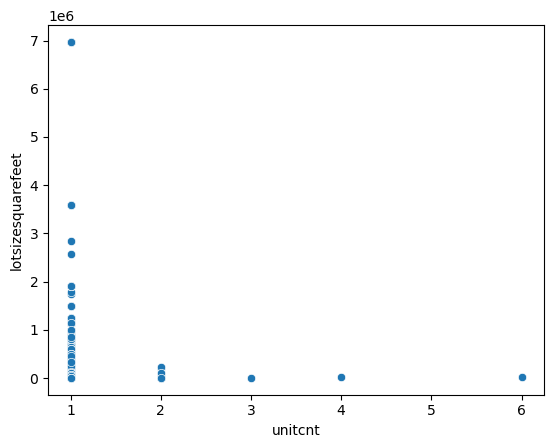

In [73]:
sns.scatterplot(data=z, x='unitcnt', y='lotsizesquarefeet')

In [74]:
zillow.propertycountylandusecode.unique()

array(['122', '1110', '0101', '010C', '1129', '0100', '34', '1111',
       '012C', '010V', '1', '0103', '010E', '0104', '01DC', '01HC',
       '0108', '010G', '010H', '0102', '010M', '0700', '73', '0109',
       '01HE', '070D', '0113', '0133', '0131', '1112', '0111', '1116',
       '0110', '0105', '012E', '0141', '0115', '010L', '012D', '0114',
       '0130', '105'], dtype=object)

In [75]:
zillow.propertyzoningdesc.unique()

array([nan, 'LCR110000*', 'LAR3', ..., 'HAR4-R2*', 'LCR1VV', 'BFA15000*'],
      dtype=object)

In [76]:
zillow.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium', 'Residential General',
       'Mobile Home', 'Townhouse'], dtype=object)

In [77]:
zillow.heatingorsystemdesc.unique()

array([nan, 'Central', 'Floor/Wall', 'Forced air', 'Yes', 'None',
       'Radiant', 'Solar', 'Baseboard', 'Gravity', 'Heat Pump'],
      dtype=object)

In [78]:
zillow.propertylandusetypeid.unique()

array([261., 266., 260., 263., 264.])

In [79]:
zillow.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium', 'Residential General',
       'Mobile Home', 'Townhouse'], dtype=object)

In [80]:
z.heatingorsystemtypeid.describe()

AttributeError: 'DataFrame' object has no attribute 'heatingorsystemtypeid'

In [81]:
z2 = data_prep(zillow, cols_to_remove=['parcelid.1', 'id.1', 'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertycountylandusecode', 'propertyzoningdesc', 'propertylandusedesc', 'unitcnt', 'heatingorsystemdesc'], prop_required_column=.5, prop_required_row=.5)

In [82]:
z2.isna().sum()

parcelid                           0
propertylandusetypeid              0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                254
calculatedfinishedsquarefeet     186
finishedsquarefeet12             366
fips                               0
fullbathcnt                      254
latitude                           0
longitude                          0
lotsizesquarefeet               8141
rawcensustractandblock             0
regionidcity                    1336
regionidcounty                     0
regionidzip                       44
roomcnt                            0
yearbuilt                        221
structuretaxvaluedollarcnt        94
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              2
taxamount                          5
censustractandblock              232
logerror                           0
transactiondate                    0
d

In [83]:
z2.T #Drop calculatedbathnbr and fullbathcnt columns as they are highly redundant 

,0,1,2,3,4,5,6,7,8,9,...,77570,77571,77572,77573,77574,77575,77576,77577,77578,77579
parcelid,14297519,17052889,14186244,12177905,10887214,17143294,12095076,12069064,12790562,11542646,...,12666457,10858613,10722691,12412492,10833991,11000655,17239384,12773139,12826780,13083743
propertylandusetypeid,261.0,261.0,261.0,261.0,266.0,266.0,261.0,261.0,261.0,266.0,...,266.0,266.0,261.0,261.0,266.0,261.0,261.0,261.0,261.0,261.0
id,1727539,1387261,11677,2288172,1970746,1447245,781532,870991,1246926,1585097,...,1684937,1642435,1373391,2274245,2864704,673515,2968375,1843709,1187175,2455685
bathroomcnt,3.5,1.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,...,3.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0,3.0,4.0,2.0,4.0,2.0,...,3.0,2.0,3.0,4.0,3.0,2.0,4.0,3.0,3.0,3.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,...,3.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0,1492.0,2962.0,738.0,3039.0,1290.0,...,2200.0,1261.0,1570.0,1633.0,1741.0,1286.0,1612.0,1032.0,1762.0,1050.0
finishedsquarefeet12,3100.0,1465.0,1243.0,2376.0,1312.0,1492.0,2962.0,738.0,3039.0,1290.0,...,2200.0,1261.0,1570.0,1633.0,1741.0,1286.0,1612.0,1032.0,1762.0,1050.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0,6111.0,6037.0,6037.0,6037.0,6037.0,...,6037.0,6037.0,6037.0,6037.0,6037.0,6037.0,6111.0,6037.0,6037.0,6037.0
fullbathcnt,3.0,1.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,...,3.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0


In [84]:
z2.regionidcity.unique() #Drop rows with nulls in region id as these are probably important clusters

array([ 53571.,  13091.,  21412., 396551.,  12447.,  51239.,  47019.,
        45457.,  14634.,  54311.,  25218.,  24832.,   8384.,  13150.,
        32380.,  17882.,     nan,   6395.,  25458.,  52650.,  46298.,
        40081.,  54053.,  33252.,  12520.,  46080.,  25459.,  45888.,
        11626.,  13693.,  52835.,  37015.,  14111., 118694.,  34636.,
        17686.,  20008.,  15554.,  39308.,  12292.,  38980.,  27491.,
        10723.,  27110., 396054.,  44833.,  10389.,  46314.,  47568.,
        37086.,  24384.,  27183.,  16764.,  26531.,  44116.,   5534.,
         4406.,  24812.,  18874.,  10734.,  22827.,  41673.,  25953.,
        10774.,  17597.,  12773.,  52842.,  50677.,  26483.,  40227.,
        15237.,  16961.,  38032.,  34543.,  30187.,  33837.,  29189.,
        24174.,  34780.,  17150.,  50749.,  10608.,  16389.,  34278.,
        40110.,  51861.,  53636.,  26964.,  13716.,  46098.,  45602.,
        51617., 396556., 396550.,  25974., 118878.,  33840.,   3491.,
        33836.,  145

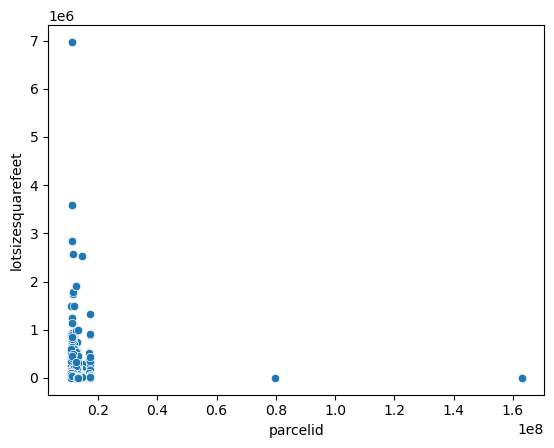

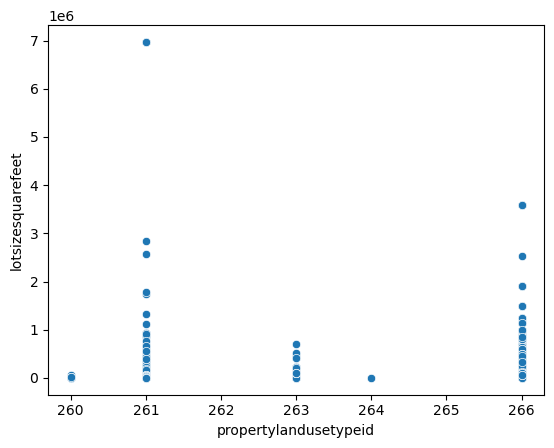

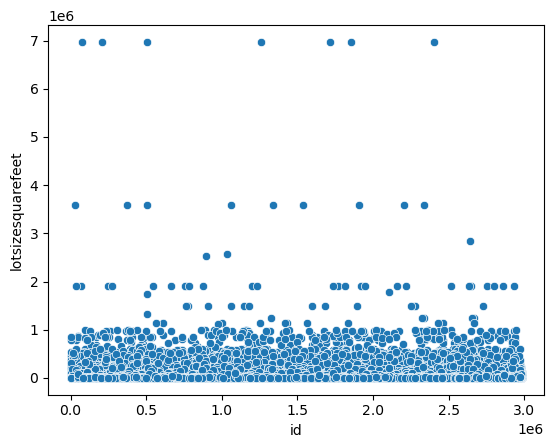

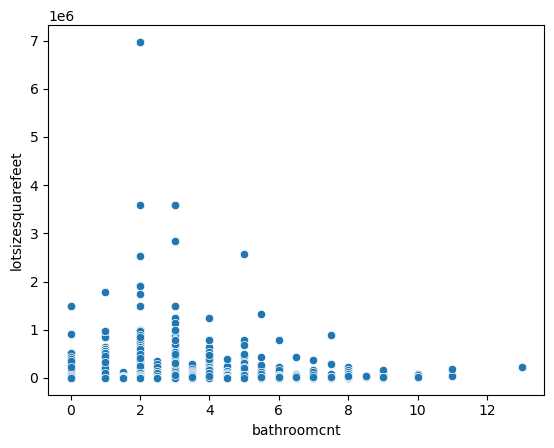

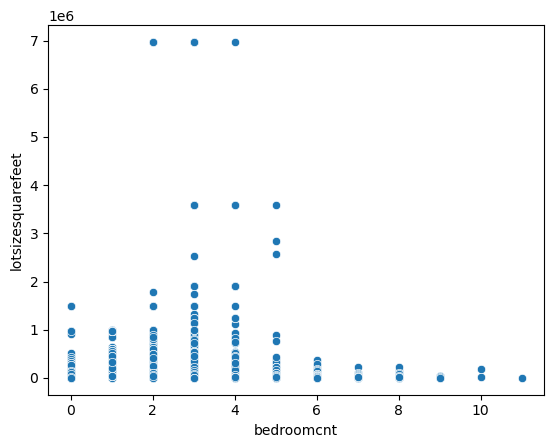

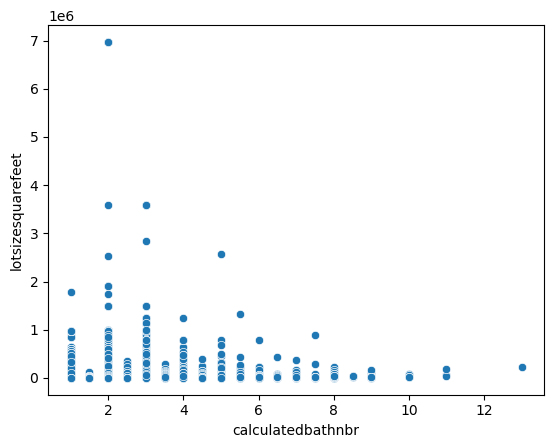

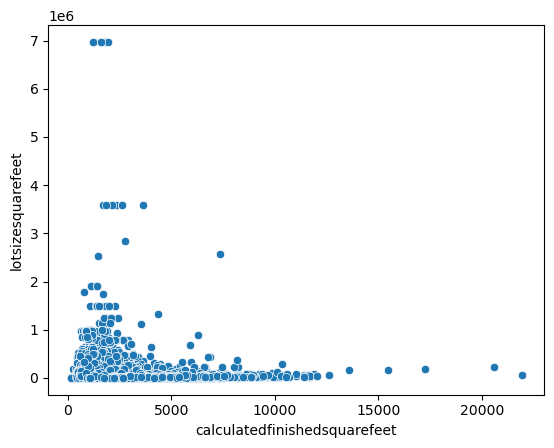

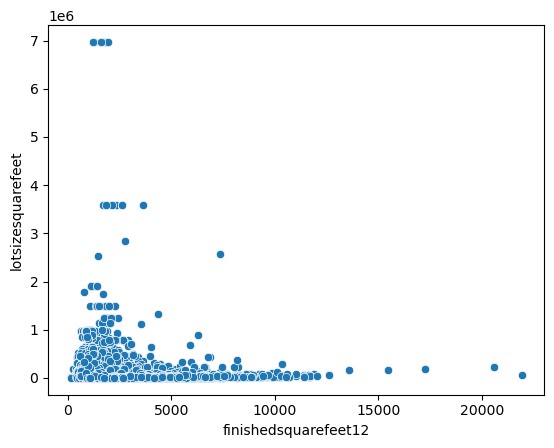

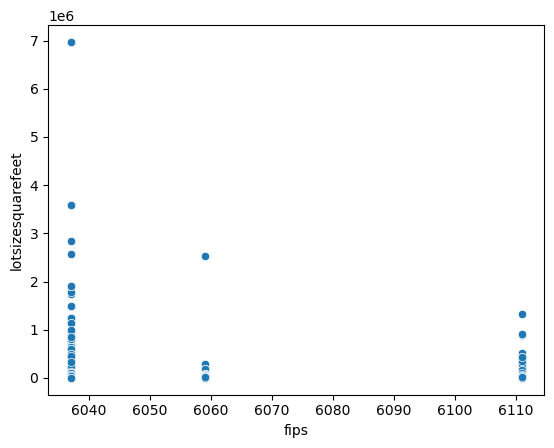

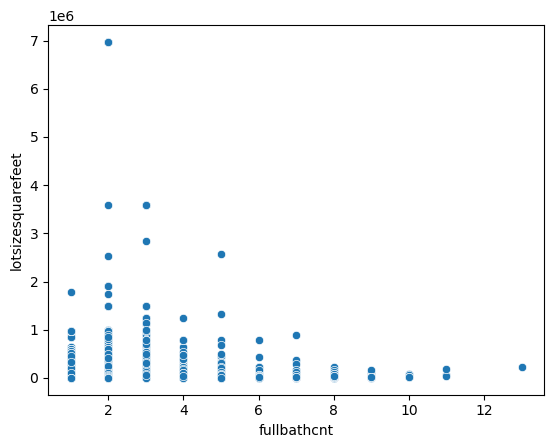

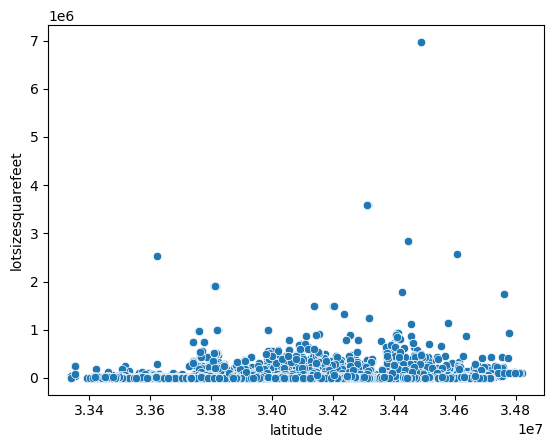

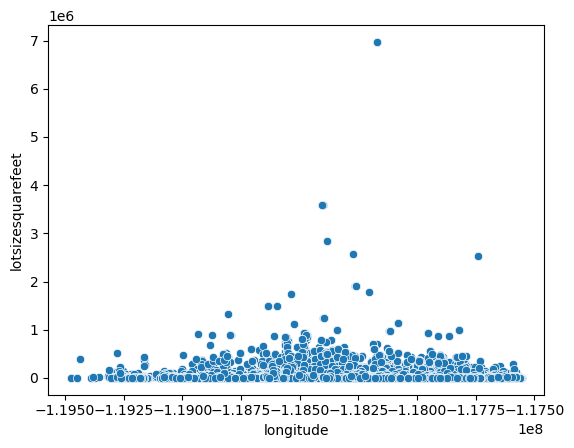

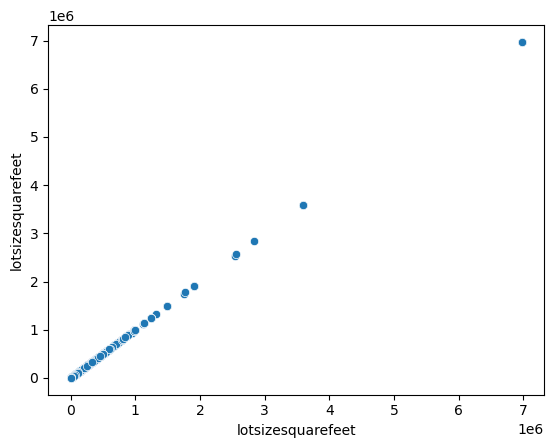

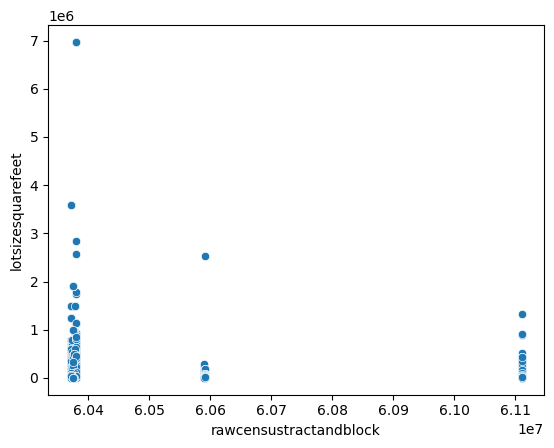

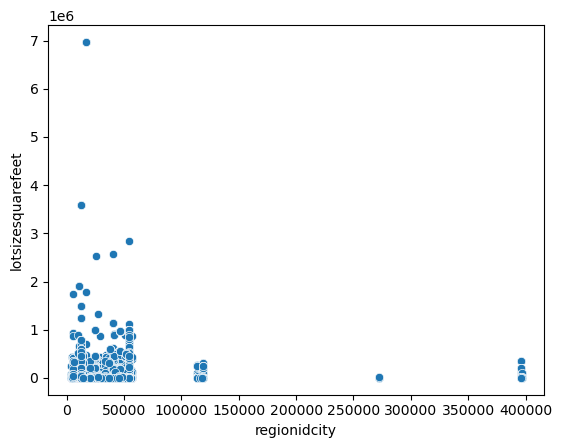

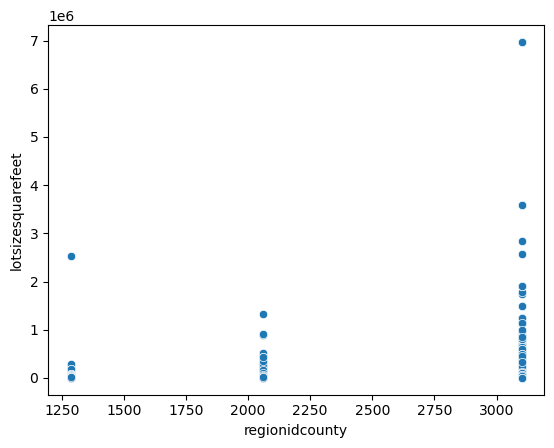

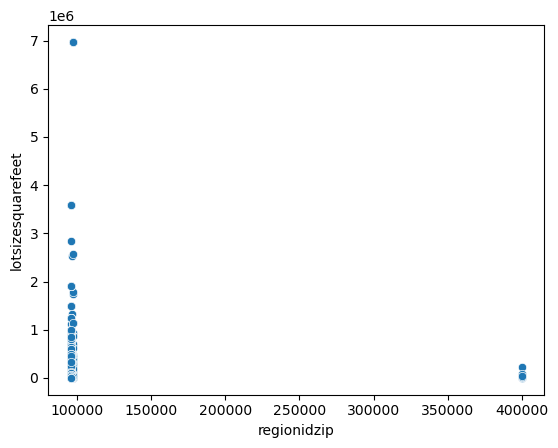

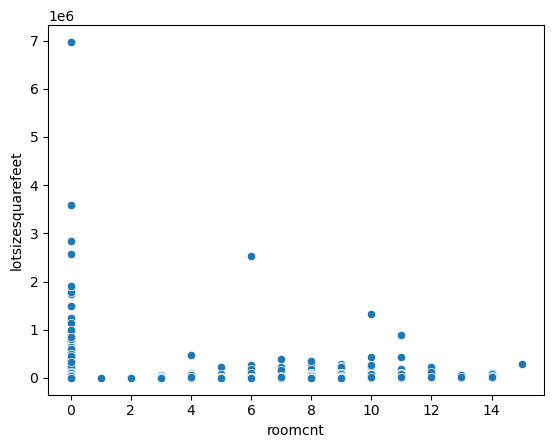

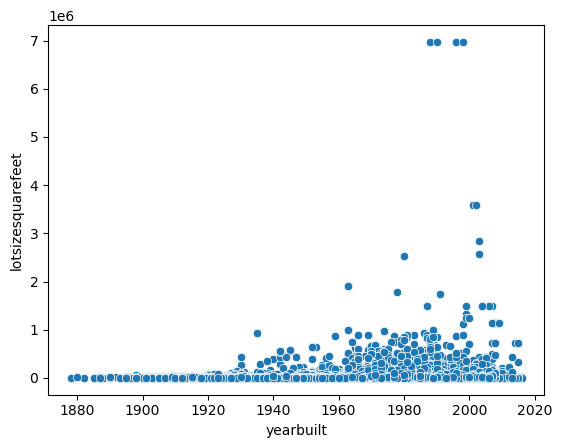

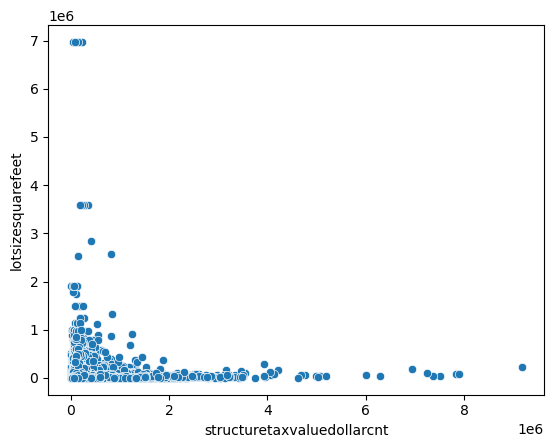

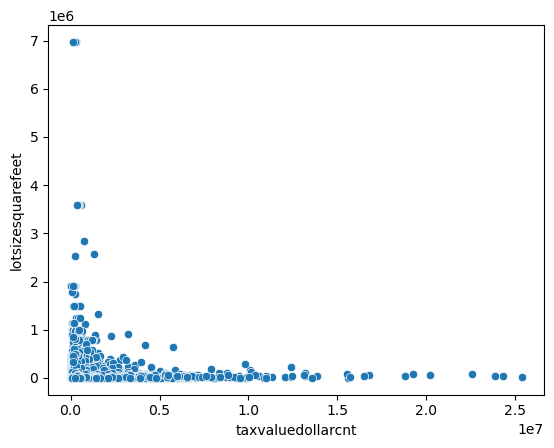

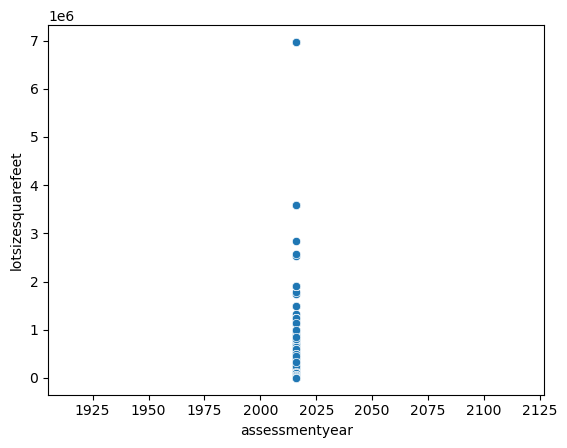

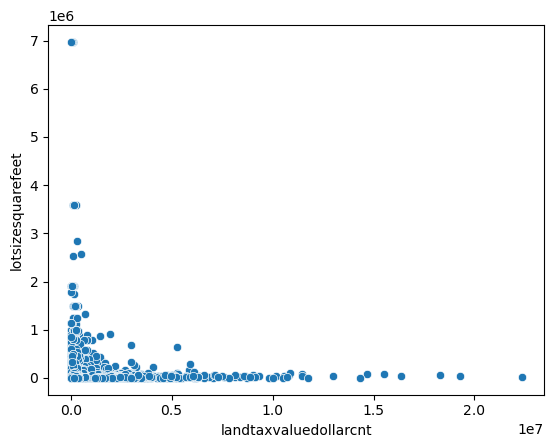

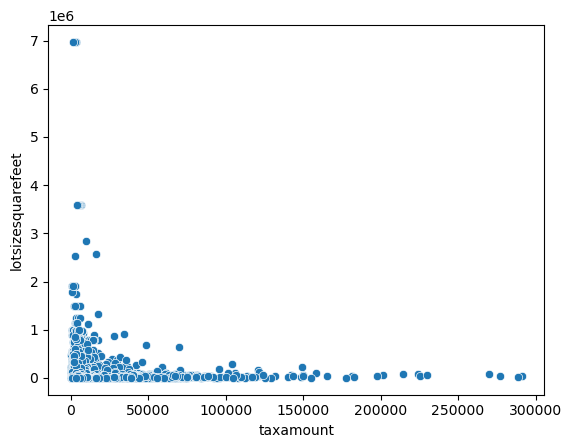

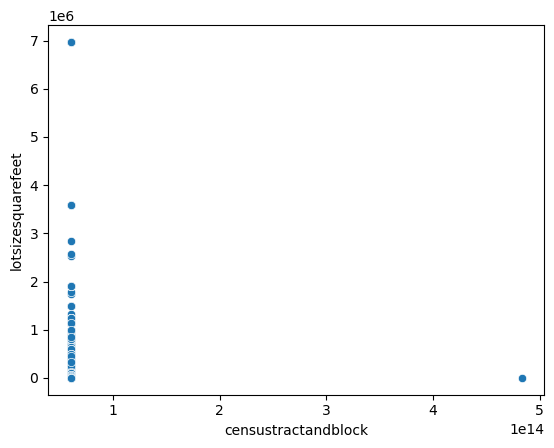

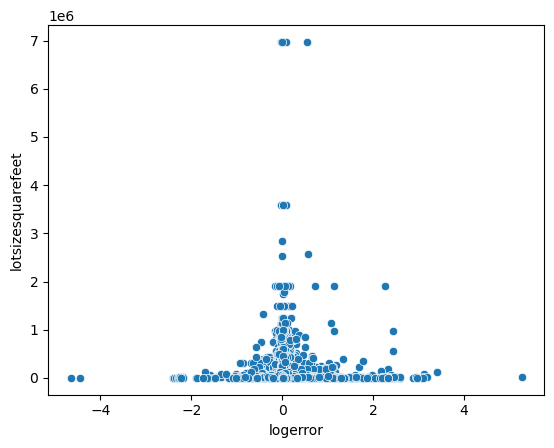

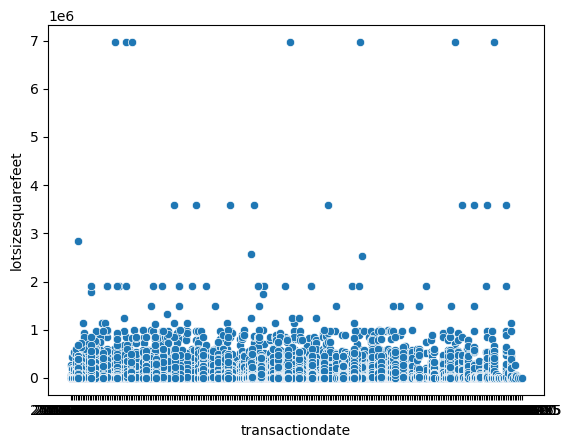

In [85]:
for col in z2.columns:
    sns.scatterplot(data=z2, x=col, y='lotsizesquarefeet')
    plt.pyplot.show()  #no obvious correlations i will drop as this probably has too high an effect on any target of interest

<Axes: xlabel='bathroomcnt', ylabel='lotsizesquarefeet'>

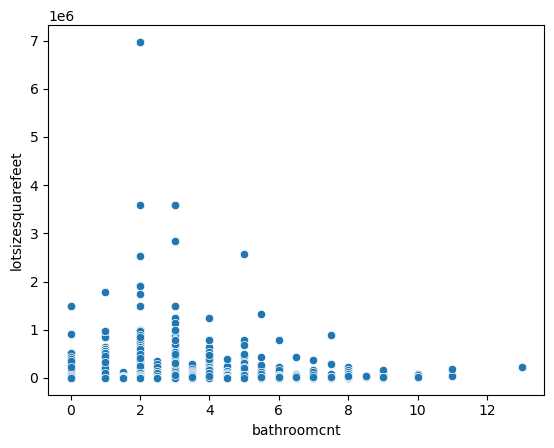

In [86]:
sns.scatterplot(data=z, x='bathroomcnt', y='lotsizesquarefeet') #No relations

In [87]:
zillow = data_prep(zillow, cols_to_remove=['parcelid.1', 'id.1', 'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertycountylandusecode', 'propertyzoningdesc', 'propertylandusedesc', 'unitcnt', 'heatingorsystemdesc', 'calculatedbathnbr', 'fullbathcnt'], prop_required_column=.5, prop_required_row=.5)

In [88]:
zillow.isna().sum()

parcelid                           0
propertylandusetypeid              0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet     186
finishedsquarefeet12             366
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8141
rawcensustractandblock             0
regionidcity                    1336
regionidcounty                     0
regionidzip                       44
roomcnt                            0
yearbuilt                        221
structuretaxvaluedollarcnt        94
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              2
taxamount                          5
censustractandblock              232
logerror                           0
transactiondate                    0
dtype: int64

In [89]:
zillow = zillow.dropna() #drops the nulls

In [90]:
zillow

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,261.0,1727539,3.5,4.0,3100.0,3100.0,6059.0,33634931.0,-117869207.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,17052889,261.0,1387261,1.0,2.0,1465.0,1465.0,6111.0,34449266.0,-119281531.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01
2,14186244,261.0,11677,2.0,3.0,1243.0,1243.0,6059.0,33886168.0,-117823170.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01
3,12177905,261.0,2288172,3.0,4.0,2376.0,2376.0,6037.0,34245180.0,-118240722.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01
4,10887214,266.0,1970746,3.0,3.0,1312.0,1312.0,6037.0,34185120.0,-118414640.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,11000655,261.0,673515,2.0,2.0,1286.0,1286.0,6037.0,34245368.0,-118282383.0,...,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20
77576,17239384,261.0,2968375,2.0,4.0,1612.0,1612.0,6111.0,34300140.0,-118706327.0,...,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21
77577,12773139,261.0,1843709,1.0,3.0,1032.0,1032.0,6037.0,34040895.0,-118038169.0,...,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21
77578,12826780,261.0,1187175,2.0,3.0,1762.0,1762.0,6037.0,33937685.0,-117996709.0,...,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25


In [91]:
zillow.isna().sum()

parcelid                        0
propertylandusetypeid           0
id                              0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
dtype: int64

In [ ]:
def wrangle_zillow(zillow):
    
    #acquire the data
    zillow = acquire.get_zillow_data()

    #Lists for single and multiple residences
    single = ['Single Family Residential', 'Condominium', 'Residential General', 'Manufactured, Modular', 
          'Prefabricated Homes', 'Mobile Home', 'Townhouse']

    multiple = ['Duplex (2 Units, Any Combination)', 
       'Planned Unit Development', 'Triplex (3 Units, Any Combination)',
       'Quadruplex (4 Units, Any Combination)', 'Cluster Home',
       'Commercial/Office/Residential Mixed Used', 'Cooperative']
    
    #Remove all multiple family properties by masking

    zillow = zillow[zillow.propertylandusedesc.isin(single) == True]

    #remove columns with too many nulls/redundant information
    zillow = data_prep(zillow, cols_to_remove=['parcelid.1', 'id.1', 'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertycountylandusecode', 'propertyzoningdesc', 'propertylandusedesc', 'unitcnt', 'heatingorsystemdesc', 'calculatedbathnbr', 'fullbathcnt'], prop_required_column=.5, prop_required_row=.5)

    #remove all na values I deemed it not necessary to impute in order to keep clusterizations clean
    zillow = zillow.dropna()
    
    return zillow

In [94]:
zillow = wrangle.wrangle_zillow(zillow)

/Users/alfredpirovits/codeup-data-science/clustering-exercises/acquire.py:11: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename, index_col=[0])


In [95]:
zillow

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,261.0,1727539,3.5,4.0,3100.0,3100.0,6059.0,33634931.0,-117869207.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,17052889,261.0,1387261,1.0,2.0,1465.0,1465.0,6111.0,34449266.0,-119281531.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01
2,14186244,261.0,11677,2.0,3.0,1243.0,1243.0,6059.0,33886168.0,-117823170.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01
3,12177905,261.0,2288172,3.0,4.0,2376.0,2376.0,6037.0,34245180.0,-118240722.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01
4,10887214,266.0,1970746,3.0,3.0,1312.0,1312.0,6037.0,34185120.0,-118414640.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,11000655,261.0,673515,2.0,2.0,1286.0,1286.0,6037.0,34245368.0,-118282383.0,...,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20
77576,17239384,261.0,2968375,2.0,4.0,1612.0,1612.0,6111.0,34300140.0,-118706327.0,...,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21
77577,12773139,261.0,1843709,1.0,3.0,1032.0,1032.0,6037.0,34040895.0,-118038169.0,...,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21
77578,12826780,261.0,1187175,2.0,3.0,1762.0,1762.0,6037.0,33937685.0,-117996709.0,...,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25
